<a href="https://colab.research.google.com/github/15483114/colab-notebooks/blob/main/hotel_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reviews for Hotels Worldwide (Booking.com)**

Neste notebook, será analisado o dataset sobre reviews de hotel ao redor do mundo.

https://www.kaggle.com/datasets/thedevastator/30000-booking-com-reviews-for-hotels-worldwide


Por uma questão de tempo serão analisados apenas os comentários em inglês.
O objetivo é ranquear os comentários mais similares a um novo comentário e recomendar um hotel para o usuário.

Importando dataset

In [90]:
import pandas as pd
df_0 = pd.read_csv('/content/marketing_sample_for_booking_com-travel__20190501_20190630__30k_data.csv')

# Analisando dataset

In [2]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       30000 non-null  int64  
 1   Uniq Id                     30000 non-null  object 
 2   Source                      30000 non-null  object 
 3   Hotel Id From Source        28167 non-null  float64
 4   Hotel Url From Source       19559 non-null  object 
 5   Hotel Name                  30000 non-null  object 
 6   Review Url                  30000 non-null  object 
 7   Review Id From Source       0 non-null      float64
 8   Review Publication Date     30000 non-null  object 
 9   Review Stay Date            0 non-null      float64
 10  Review Author Type          30000 non-null  object 
 11  Review Author Name          9462 non-null   object 
 12  Review Author Location      9459 non-null   object 
 13  Review Author Age           992

In [127]:
df_0.columns

Index(['index', 'Uniq Id', 'Source', 'Hotel Id From Source',
       'Hotel Url From Source', 'Hotel Name', 'Review Url',
       'Review Id From Source', 'Review Publication Date', 'Review Stay Date',
       'Review Author Type', 'Review Author Name', 'Review Author Location',
       'Review Author Age', 'Review Author Gender', 'Review Locale',
       'Review Author Count', 'Review Stay Details', 'Review Title',
       'Review Text Neutral', 'Review Text Positive', 'Review Text Negative',
       'Review Text Hotel Location', 'Review Rating', 'Entry Added At',
       'Entry Processed At', 'Review Misc'],
      dtype='object')

In [128]:
df_0

,index,Uniq Id,Source,Hotel Id From Source,Hotel Url From Source,Hotel Name,Review Url,Review Id From Source,Review Publication Date,Review Stay Date,...,Review Stay Details,Review Title,Review Text Neutral,Review Text Positive,Review Text Negative,Review Text Hotel Location,Review Rating,Entry Added At,Entry Processed At,Review Misc
0,0,18716717a51fec76cde1bab4d774226b,www.booking.com,2432254.0,NaN,Villa Raljević,https://www.booking.com/reviews/hr/hotel/apart...,NaN,NO REVIEWS IN GIVEN DATE RANGE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,b6743834cbe918686a6454368ac5875a,www.booking.com,NaN,NaN,ABC Luxury Apartments,https://www.booking.com/reviews/hr/hotel/abc-l...,NaN,NO REVIEWS IN GIVEN DATE RANGE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3f8d37e4714627b4d35b6632b0fbe601,www.booking.com,NaN,NaN,Lalang Lacuo Pasture,https://www.booking.com/reviews/cn/hotel/la-la...,NaN,NO REVIEWS IN GIVEN DATE RANGE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,38d6c68d8d8fb6e90adc1c27b2d00eae,www.booking.com,3344281.0,https://www.booking.com/reviews/vn/hotel/t4-b1...,Masteri Sunny Apartment,https://www.booking.com/reviews/vn/hotel/t4-b1...,NaN,2018-11-23,NaN,...,Business trip | Solo traveller | Apartment |...,“Suasana dan kemudahan yg di sediakan”,NaN,Suasana dan kemudahan yg di sediakan,No,NaN,10.0,NaN,NaN,NaN
4,4,0be899211a0fa0b8797547122eb25b1c,www.booking.com,1010312.0,https://www.booking.com/reviews/fr/hotel/los-a...,Apartment Los Amigos.9,https://www.booking.com/reviews/fr/hotel/los-a...,NaN,2018-09-01,NaN,...,NaN,NO REVIEWS IN DATE RANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,72b707cba599211e9cf7991ff073e009,www.booking.com,1999419.0,NaN,Apartment on Navarynska,https://www.booking.com/reviews/ua/hotel/apart...,NaN,NO REVIEWS IN GIVEN DATE RANGE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29996,29996,6a9784e1c561a28c6e45e9898f2a77a8,www.booking.com,3295807.0,NaN,Beautiful view Kamilari,https://www.booking.com/reviews/gr/hotel/beaut...,NaN,NO REVIEWS IN GIVEN DATE RANGE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29997,29997,935513c2edb33b6042e545ea2345da10,www.booking.com,1101486.0,https://www.booking.com/reviews/it/hotel/donat...,Little Garden Donatello,https://www.booking.com/reviews/it/hotel/donat...,NaN,2018-11-04,NaN,...,Leisure trip | Couple | Suite with City View...,“Ottimo soggiorno”,NaN,"La casa è molto bella, in un vecchio palazzo, ...",La cucina un po' poco fornita,NaN,10.0,NaN,NaN,NaN
29998,29998,4e7e943c8620dbbfc4bec84e0768ef36,www.booking.com,3090858.0,https://www.booking.com/reviews/ru/hotel/2-kom...,Apartment on Tani Bibinoy,https://www.booking.com/reviews/ru/hotel/2-kom...,NaN,2018-09-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Criando novo dataframe com as colunas desejadas

In [129]:
df = df_0[['index','Review Stay Details', 'Review Text Positive', 'Review Title']].copy()

# Tratando os comentários positivos e títulos

In [130]:
# colocando um texto padrão em review title e review details para não deletar os comentários
df['Review Stay Details'] = df['Review Stay Details'].fillna("default text")
df['Review Title'] = df['Review Title'].fillna("default text")

In [131]:
# Porcentagem de dados faltantes
df.isnull().mean().round(4)*100

index                    0.00
Review Stay Details      0.00
Review Text Positive    70.89
Review Title             0.00
dtype: float64

In [132]:
df.dropna(inplace=True)

In [52]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/commands/install.py", line 385, in run
    conflicts = self._determine_conflicts(to_install)
 

In [133]:
# trocando emojis por palavras
import emoji

array=[]
for x in df['Review Text Positive']:
  variable = emoji.demojize(x, delimiters=("", ""))
  array.append(variable)
df['Review Text Positive'] = array

array2=[]
for x in df['Review Title']:
  variable = emoji.demojize(x, delimiters=("", ""))
  array2.append(variable)
df['Review Title'] = array2

In [135]:
# removendo pontuação e colocando em letra minuscula

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
corpus = []
for x in df['Review Text Positive']:
  review = re.sub('[^a-zA-Z]', ' ', x)
  review = review.lower()
  corpus.append(review)
df['Review Text Positive'] = corpus

# Realizando o mesmo tratamento para a coluna de Review Title
corpus2 = []
for x in df['Review Title']:
  review = re.sub('[^a-zA-Z]', ' ', x)
  review = review.lower()
  corpus2.append(review)
df['Review Title'] = corpus2

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Descobrindo comentários em inglês

In [10]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 4.9 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=280fa705fb747dc48c3338cd3dd228b66957c03f1c35dbb5ecc7b7f2eb649712
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [136]:
from langdetect import detect

array=[]
for x in df['Review Text Positive']:
  # print(x)
  try:
    variable = detect(x)
  except:
    variable = "nuthin"
  array.append(variable)
# Colocando na coluna Language a sigla da língua detectada
df['Language'] = array

In [137]:
df

,index,Review Stay Details,Review Text Positive,Review Title,Language
3,3,Business trip | Solo traveller | Apartment |...,suasana dan kemudahan yg di sediakan,suasana dan kemudahan yg di sediakan,id
6,6,Leisure trip | Couple | Classic Triple Room ...,die lage direkt am meer mit dem flachabfallend...,urlaub mit abstrichen,de
8,8,Leisure trip | Couple | Standard Double Room...,location was great friendly staff,location was great staff were lovely but the...,en
9,9,Leisure trip | Solo traveller | Suite | Sta...,excellent location,very good,fr
12,12,Leisure trip | Couple | Three-Bedroom Apartm...,sehr reichhaltige ausstattung unkomplizierte...,italienisch charmant und liebenswert,de
...,...,...,...,...,...
29981,29981,Leisure trip | Couple | Standard Double Room...,nous avons appr ci l accueil et la gentilless...,s jour authentique surf ferrel,fr
29986,29986,Leisure trip | Couple | Apartment | Stayed ...,comfortable rooms with fully equipped kitchen ...,comfortable but noisy,en
29987,29987,Leisure trip | Group | Twin Room - Non-Smoki...,de bedden en de gratis fietsen,de bedden en de gratis fietsen,nl
29991,29991,Business trip | Solo traveller | Studio with...,location garden cleanness compared to air b...,i would a recommend this place for a short st...,en


In [138]:
# selecionando colunas que têm comentários em inglês
english_comments = df[df['Language'] == 'en']

# Nuvem de palavras

In [37]:
!pip install numpy
!pip install pillow
!pip install matplotlib
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


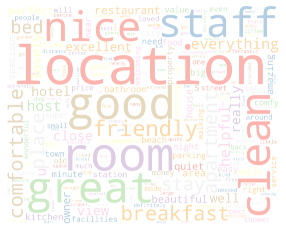

In [139]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

text = " ".join(cat for cat in english_comments['Review Text Positive'])

# Generate word cloud
word_cloud = WordCloud(
    width=5000,
    height=4000,
    random_state=1,
    background_color="white",
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
    ).generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

Nuvem de palavras a coluna de título

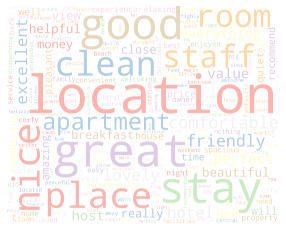

In [140]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

text = " ".join(cat for cat in english_comments['Review Title'])

# Generate word cloud
word_cloud = WordCloud(
    width=5000,
    height=4000,
    random_state=1,
    background_color="white",
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
    ).generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

# Aplicando tf-idf

In [141]:
# Adicionando nova frase no dataframe
new_row = pd.DataFrame({'index':0, 'Review Stay Details':'', 'Review Text Positive':'lovely view to the beach', 'Review Title':'lovely view to the beach'}, index=[0])
english_comments = pd.concat([new_row,english_comments.loc[:]]).reset_index(drop=True)
df2 = pd.concat([new_row,english_comments.loc[:]]).reset_index(drop=True)
print (df2)

      index                                Review Stay Details  \
0         0                                                      
1         0                                                      
2         8  Leisure trip |  Couple |  Standard Double Room...   
3        19  Leisure trip |  Family with young children |  ...   
4        32  Leisure trip |  Solo traveller |  Bed in 8-Bed...   
...     ...                                                ...   
3106  29953  Leisure trip |  Family with young children |  ...   
3107  29974  Leisure trip |  Couple |  Studio Apartment |  ...   
3108  29980  Leisure trip |  Couple |  Double Room with Vil...   
3109  29986  Leisure trip |  Couple |  Apartment |  Stayed ...   
3110  29991  Business trip |  Solo traveller |  Studio with...   

                                   Review Text Positive  \
0                              lovely view to the beach   
1                              lovely view to the beach   
2                    location 

In [147]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

corpus = df2["Review Text Positive"]
X_train_counts = count_vect.fit_transform(corpus)

pd.DataFrame(X_train_counts.toarray(),columns=count_vect.get_feature_names(),index= df2["Review Stay Details"])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abbey,abd,aberdeen,abided,ability,able,abosolute,about,above,abruzzo,...,zach,zadar,zagreb,zgodny,zhenhai,zise,zob,zone,zoo,zum
Review Stay Details,,,,,,,,,,,,,,,,,,,,,
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Leisure trip | Couple | Standard Double Room | Stayed 1 night | Submitted via mobile,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Leisure trip | Family with young children | Standard Queen Room with Two Queen Beds | Stayed 1 night | Submitted via mobile,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Leisure trip | Solo traveller | Bed in 8-Bed Mixed Dormitory Room | Stayed 2 nights | Submitted via mobile,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Leisure trip | Family with young children | Three-Bedroom House | Stayed 7 nights,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Leisure trip | Couple | Studio Apartment | Stayed 2 nights | Submitted via mobile,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Leisure trip | Couple | Double Room with Village View | Stayed 2 nights | Submitted via mobile,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Normalizando resultados

In [148]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

trsfm=vectorizer.fit_transform(corpus)
pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names())


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abbey,abd,aberdeen,abided,ability,able,abosolute,about,above,abruzzo,...,zach,zadar,zagreb,zgodny,zhenhai,zise,zob,zone,zoo,zum
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculando a similaridade dos cossenos

em que valores mais próximo de 1 representam maior similaridades entre os vetore
valores mais próximos de 0 pouca similaridade
valores mais próximos de -1 similaridade oposta

In [149]:
from sklearn.metrics.pairwise import cosine_similarity

cos = cosine_similarity(trsfm[0], trsfm)
# cos_title = cosine_similarity(trsfm_title[0], trsfm_title)

Ranqueando os resultado mais próximos da frase inserida

In [150]:
cos[0][1:] 

array([1.        , 0.        , 0.06736166, ..., 0.25209568, 0.        ,
       0.02754406])

In [151]:
english_comments['cosine_similarity'] = cos[0][1:] 

In [106]:
# ordenando dataset 
english_comments.sort_values(by='cosine_similarity', ascending=False)

,index,Review Stay Details,Review Text Positive,Review Title,Language,cosine_similarity
0,0,,Lovely view to the beach,Lovely view to the beach,NaN,1.000000
1084,9991,Leisure trip | Couple | Premium Double Room ...,The beach,Great area to visit,en,0.630007
1785,16791,Leisure trip | Family with young children | ...,close to the beach,close to the beach,en,0.568258
230,2106,Leisure trip | Group | Double or Twin Room |...,the view,the view,en,0.567803
2894,27669,Business trip | Solo traveller | Studio Apar...,the view,the view,en,0.567803
...,...,...,...,...,...,...
369,3497,Leisure trip | Solo traveller | Queen Room w...,Good TV Room was clean,Good TV,en,0.000000
2259,21464,Leisure trip | Solo traveller | Bunk Bed in ...,Location is not bad,Location is not bad,en,0.000000
370,3516,Leisure trip | Solo traveller | Economy Sing...,Good stay clean kitchen and wc perfect locat...,Good stay clean kitchen and wc perfect loca...,en,0.000000
371,3517,Leisure trip | Couple | Double Room | Staye...,Clean good food nice room,enjoyable stay friendly staff,en,0.000000


Repetindo o processo para a coluna de titulo

In [152]:
count_vect = CountVectorizer()

corpus_title = df2["Review Title"]
X_train_counts_title = count_vect.fit_transform(corpus_title)

pd.DataFrame(X_train_counts_title.toarray(),columns=count_vect.get_feature_names(),index= df2["Review Title"])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aanbevelen,aberdeenshire,able,about,above,absolute,absolutely,absolutey,acceptable,accepted,...,yr,zagreb,zaragoza,zinc,zob,zone,zu,zullen,zum,zwei
Review Title,,,,,,,,,,,,,,,,,,,,,
lovely view to the beach,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lovely view to the beach,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
location was great staff were lovely but the rooms need a makeover and freshen up,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
great getaway,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
great place,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
high class dog friendly self catering house excellent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
location,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
the view is stunning,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
vectorizer = TfidfVectorizer()

trsfm_title=vectorizer.fit_transform(corpus_title)
pd.DataFrame(trsfm_title.toarray(),columns=vectorizer.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aanbevelen,aberdeenshire,able,about,above,absolute,absolutely,absolutey,acceptable,accepted,...,yr,zagreb,zaragoza,zinc,zob,zone,zu,zullen,zum,zwei
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
corpus_title = df2["Review Title"]
titles = count_vect.fit_transform(corpus_title)

pd.DataFrame(titles.toarray(),columns=count_vect.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aanbevelen,aberdeenshire,able,about,above,absolute,absolutely,absolutey,acceptable,accepted,...,yr,zagreb,zaragoza,zinc,zob,zone,zu,zullen,zum,zwei
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
cos = cosine_similarity(trsfm_title[0], trsfm_title)

In [156]:
english_comments['cosine_similarity_titles'] = cos[0][1:] 

In [157]:
english_comments.sort_values(by='cosine_similarity_titles', ascending=False)

,index,Review Stay Details,Review Text Positive,Review Title,Language,cosine_similarity,cosine_similarity_titles
0,0,,lovely view to the beach,lovely view to the beach,NaN,1.000000,1.000000
1759,16791,Leisure trip | Family with young children | ...,close to the beach,close to the beach,en,0.567834,0.596041
2325,22299,Leisure trip | Solo traveller | Bed in 6-Bed...,close to the beach very clean friendly and h...,close to the beach,en,0.395102,0.596041
226,2106,Leisure trip | Group | Double or Twin Room |...,the view,the view,en,0.566822,0.591310
2871,27669,Business trip | Solo traveller | Studio Apar...,the view,the view,en,0.566822,0.591310
...,...,...,...,...,...,...,...
1619,15324,Leisure trip | Family with young children | ...,the hosts were very welcoming plenty of good ...,great spot for a weekend in waterford,en,0.040051,0.000000
512,4957,Leisure trip | Group | Apartment | Stayed 1...,well located modern very clean and perfectly...,well located modern very clean and perfectl...,en,0.013908,0.000000
1616,15307,Leisure trip | Group | Apartment | Stayed 2...,great location part of q so we re avaiable ...,just fine,en,0.070399,0.000000
1615,15305,Leisure trip | Solo traveller | Bunk Bed in ...,selfish staff,selfish staff,en,0.000000,0.000000



Testando juntar as colunas de review positive e review title usando a raiz da soma dos quadrados dos cossenos

In [164]:
english_comments['soma_quadrado_cosseno'] = (english_comments['cosine_similarity']**2 + english_comments['cosine_similarity_titles']**2)**0.5

In [165]:
english_comments.sort_values(by='soma_quadrado_cosseno', ascending=False)

,index,Review Stay Details,Review Text Positive,Review Title,Language,cosine_similarity,cosine_similarity_titles,soma_quadrado_cosseno
0,0,,lovely view to the beach,lovely view to the beach,NaN,1.000000,1.000000,1.414214
1759,16791,Leisure trip | Family with young children | ...,close to the beach,close to the beach,en,0.567834,0.596041,0.823225
226,2106,Leisure trip | Group | Double or Twin Room |...,the view,the view,en,0.566822,0.591310,0.819106
2871,27669,Business trip | Solo traveller | Studio Apar...,the view,the view,en,0.566822,0.591310,0.819106
2325,22299,Leisure trip | Solo traveller | Bed in 6-Bed...,close to the beach very clean friendly and h...,close to the beach,en,0.395102,0.596041,0.715102
...,...,...,...,...,...,...,...,...
2130,20213,Leisure trip | Group | Triple Room with Bath...,excellent service from sharon and her team at ...,brilliant team thanks sharon for being so a...,en,0.000000,0.000000,0.000000
2128,20195,Leisure trip | Solo traveller | Deluxe Singl...,wonderful healthy breakfast tasteful d cor g...,pleasant welcoming and very comfortable,en,0.000000,0.000000,0.000000
834,7949,Leisure trip | Family with young children | ...,location good friendly staff,worth for stay,en,0.000000,0.000000,0.000000
2126,20177,Leisure trip | Couple | Twin Room with Priva...,...,,en,0.000000,0.000000,0.000000


Conclusão

Neste trabalho foi desenvolvido um sistema de recomendção de hotéis utilizando a proximidade dos cossenos nos comentários de reviews positivas, título das avaliações e a raiz da soma dos quadrados das duas colunas de texto e ranqueando os valores de cada cada coluna do maior para o menor.

A respeito da qualidade das recomendações seria preciso realizar entrevistas com usuários para saber se as recomendações estão condizentes com seus gostos. Mas em um impressão geral, nota-se que a estratégia de ranqueamento é afetada por quantidades de texto maiores, uma vez que a frase 'Lovely view to the beach', a frase confeccionada para o estudo, possui mais similaridade com as frases 'The beach', 'close to the beach' e 'The view' do que '
the view was amazing from our room room had everything you would need close to the beach and had a view of it too', sendo a última uma frase que engloba as duas características solicitadas pela frase confeccionada no estudo, que pedia um vista agradável para a praia.

Devido a esse fator, a coluna de títulos aprarentou ter melhores resultados, uma vez que por ser um título possui menos texto para ser comparado.